<a href="https://colab.research.google.com/github/ericgbraz/COLAB_PED/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import io
import gzip

dataframes = []

urls = ["https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time_2020.csv.gz",
        "https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time_2021.csv.gz",
        "https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time_2022.csv.gz",
        "https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz"
       ]

print(type(urls))

for url in urls:
  response = requests.get(url)
  content  = response.content
  compressed_file = io.BytesIO(content)
  uncompressed_file = gzip.GzipFile(fileobj=compressed_file)
  df = pd.read_csv(uncompressed_file)
  dataframes.append(df)

df_total = pd.concat(dataframes)



<class 'list'>


In [18]:
df_cities = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cities_info.csv")
df_cities

,ibge,city,state,region,pop2019,pop2020,pop2021,isCountryside,cod_RegiaoDeSaude,name_RegiaoDeSaude,ibge_id
0,2600054,Abreu e Lima/PE,PE,Nordeste,99990,100346,100698,0,26010,Recife,2600054
1,2600104,Afogados da Ingazeira/PE,PE,Nordeste,37259,37404,37546,1,26001,Afogados da Ingazeira,2600104
2,2600203,Afrânio/PE,PE,Nordeste,19635,19810,19981,1,26009,Petrolina,2600203
3,2600302,Agrestina/PE,PE,Nordeste,24885,25065,25240,1,26003,Caruaru,2600302
4,2600401,Água Preta/PE,PE,Nordeste,36771,37082,37386,1,26008,Palmares,2600401
...,...,...,...,...,...,...,...,...,...,...,...
5565,1504752,Mojuí dos Campos/PA,PA,Norte,16084,16184,16282,1,15002,Baixo Amazonas,1504752
5566,4220000,Balneário Rincão/SC,SC,Sul,12760,12946,13129,1,42015,Carbonífera,4220000
5567,4212650,Pescaria Brava/SC,SC,Sul,10091,10159,10225,1,42016,Laguna,4212650
5568,4314548,Pinto Bandeira/RS,RS,Sul,3003,3036,3068,1,43025,Região 25 - Vinhedos e Basalto,4314548


In [ ]:
#https://colab.research.google.com/drive/1H1N387IIAGV-3YRtyxzPz94vSiLrhE0M?usp=sharing
df_total


,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,9,2020-02-25,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000
1,9,2020-02-25,TOTAL,TOTAL,0,0,0,1,1,0.000,0.000,0.000
2,9,2020-02-26,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
3,9,2020-02-26,TOTAL,TOTAL,0,0,0,0,1,0.000,0.000,0.000
4,9,2020-02-27,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
430964,311,2023-03-18,PR,Ângulo/PR,4101150,0,11,0,967,375.299,32992.153,0.011
430965,311,2023-03-18,BA,Érico Cardoso/BA,2900504,0,53,13,2467,504.138,23466.185,0.021
430966,311,2023-03-18,PA,Óbidos/PA,1505106,0,166,25,8717,316.353,16612.353,0.019
430967,311,2023-03-18,SP,Óleo/SP,3533809,0,6,0,162,245.198,6620.351,0.037


In [29]:
df_estado = df_total.query('state != "TOTAL" & newDeaths >= 0 & newCases >=0').sort_values('date',ascending=True)

df_estado["date"] = pd.to_datetime(df_estado["date"])
df_estado['ano_mes'] = df_estado['date'].dt.to_period('M').apply(lambda r: r.to_timestamp().strftime('%Y-%m'))
df_estado['dia'] = df_estado['date'].dt.day
df_estado['mes'] = df_estado['date'].dt.month
df_estado['ano'] = df_estado['date'].dt.year
df_estado['media_movel'] = df_estado['newDeaths'].rolling(window=7).mean() 
df_estado


,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,ano_mes,dia,mes,ano,media_movel
0,9,2020-02-25,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000,2020-02,25,2,2020,NaN
2,9,2020-02-26,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000,2020-02,26,2,2020,NaN
4,9,2020-02-27,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000,2020-02,27,2,2020,NaN
6,9,2020-02-28,SP,São Paulo/SP,3550308,0,0,1,2,0.000,0.016,0.000,2020-02,28,2,2020,NaN
8,9,2020-02-29,SP,São Paulo/SP,3550308,0,0,0,2,0.000,0.016,0.000,2020-02,29,2,2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427250,311,2023-03-18,SC,Garuva/SC,4205803,0,41,6,3896,217.900,20705.782,0.011,2023-03,18,3,2023,0.0
427249,311,2023-03-18,RS,Garruchos/RS,4308656,0,7,0,173,245.528,6068.046,0.040,2023-03,18,3,2023,0.0
427248,311,2023-03-18,PA,Garrafão do Norte/PA,1503077,0,14,0,2175,53.527,8315.810,0.006,2023-03,18,3,2023,0.0
427256,311,2023-03-18,BA,Gavião/BA,2911253,0,5,0,657,113.199,14874.349,0.008,2023-03,18,3,2023,0.0


In [44]:
df_brasil = df_total.query('state == "TOTAL" & newDeaths >= 0 & newCases >=0').sort_values('date',ascending=True)

df_brasil["date"] = pd.to_datetime(df_brasil["date"])
df_brasil['ano_mes'] = df_brasil['date'].dt.to_period('M').apply(lambda r: r.to_timestamp().strftime('%Y-%m'))
df_brasil['dia'] = df_brasil['date'].dt.day
df_brasil['mes'] = df_brasil['date'].dt.month
df_brasil['ano'] = df_brasil['date'].dt.year
df_brasil['media_movel'] = df_brasil['newDeaths'].rolling(window=7).mean() 
df_brasil


,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,ano_mes,dia,mes,ano,media_movel
1,9,2020-02-25,TOTAL,TOTAL,0,0,0,1,1,0.000,0.000,0.000,2020-02,25,2,2020,NaN
3,9,2020-02-26,TOTAL,TOTAL,0,0,0,0,1,0.000,0.000,0.000,2020-02,26,2,2020,NaN
5,9,2020-02-27,TOTAL,TOTAL,0,0,0,0,1,0.000,0.000,0.000,2020-02,27,2,2020,NaN
7,9,2020-02-28,TOTAL,TOTAL,0,0,0,1,2,0.000,0.001,0.000,2020-02,28,2,2020,NaN
9,9,2020-02-29,TOTAL,TOTAL,0,0,0,0,2,0.000,0.001,0.000,2020-02,29,2,2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408580,311,2023-03-14,TOTAL,TOTAL,0,0,699310,0,37085520,327.826,17385.116,0.019,2023-03,14,3,2023,4.857143
414177,311,2023-03-15,TOTAL,TOTAL,0,0,699310,0,37085520,327.826,17385.116,0.019,2023-03,15,3,2023,4.857143
419774,311,2023-03-16,TOTAL,TOTAL,0,0,699310,0,37085520,327.826,17385.116,0.019,2023-03,16,3,2023,4.857143
425371,311,2023-03-17,TOTAL,TOTAL,0,0,699310,0,37085520,327.826,17385.116,0.019,2023-03,17,3,2023,0.000000


In [ ]:
import matplotlib.pyplot as plt


In [43]:
total_casos = df_brasil['newCases'].sum()
total_obitos = df_brasil['newDeaths'].sum()
print("Total de casos confirmados:", total_casos)
print("Total de óbitos:", total_obitos)


Total de casos confirmados: 37087598
Total de óbitos: 699270


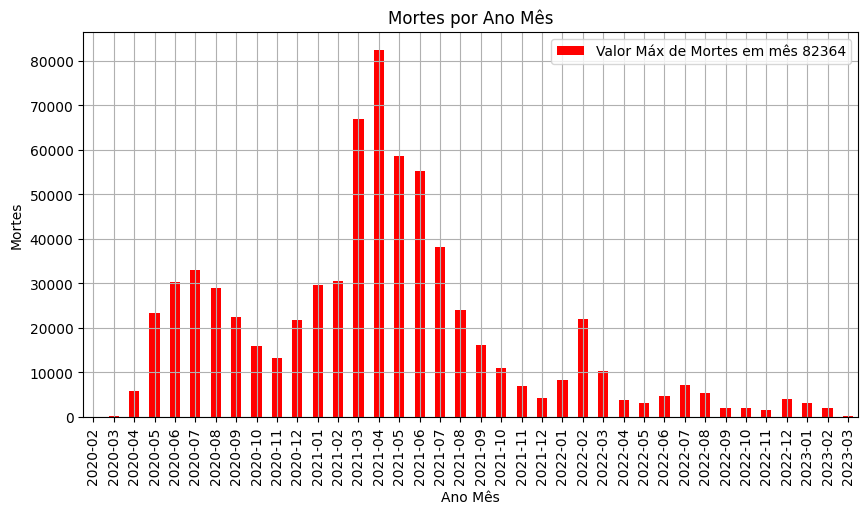

In [210]:
df_brasil
mortes_por_ano = df_brasil.groupby('ano_mes')['newDeaths'].sum()

#mortes_por_ano = df_brasil.groupby('ano_mes')['newDeaths'].sum().reset_index(name='soma')
#mortes_por_ano['soma'].max()

mortes_por_ano.plot(y= mortes_por_ano.index, x = mortes_por_ano.values, kind = 'bar', color = 'red',figsize=(10,5), label= 'Valor Máx de Mortes em mês '+str(mortes_por_ano.values.max()));

plt.xlabel('Ano Mês')
plt.ylabel('Mortes')
plt.title('Mortes por Ano Mês')
plt.xticks(rotation=90)
plt.grid()
plt.legend();

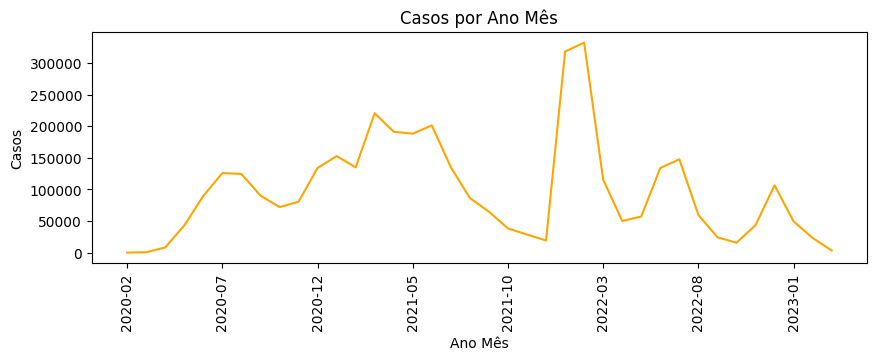

In [97]:
df_brasil
casos_por_ano = df_brasil.groupby('ano_mes')['newCases'].sum()/10
casos_por_ano.plot(y= casos_por_ano.index, x = casos_por_ano.values, color = 'orange',figsize=(10,3));
plt.xlabel('Ano Mês')
plt.ylabel('Casos')
plt.title('Casos por Ano Mês')
plt.xticks(rotation=90)
plt.show()

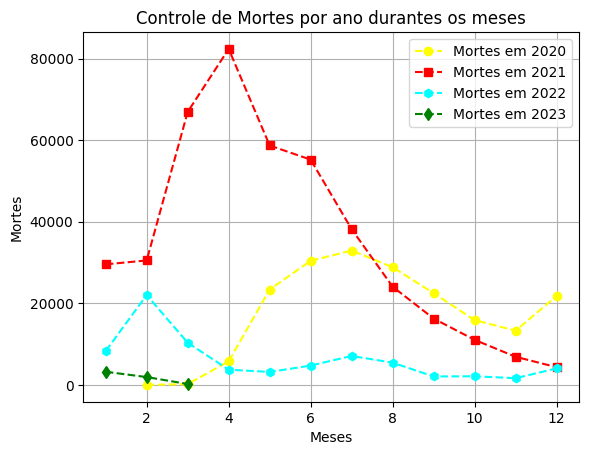

In [99]:
plt.rcdefaults()

mortes_por_mes_2020 = df_brasil[df_brasil['ano'] == 2020].groupby('mes')['newDeaths'].sum()
mortes_por_mes_2021 = df_brasil[df_brasil['ano'] == 2021].groupby('mes')['newDeaths'].sum()
mortes_por_mes_2022 = df_brasil[df_brasil['ano'] == 2022].groupby('mes')['newDeaths'].sum()
mortes_por_mes_2023 = df_brasil[df_brasil['ano'] == 2023].groupby('mes')['newDeaths'].sum()

plt.plot(mortes_por_mes_2020.index, mortes_por_mes_2020.values, label = "Mortes em 2020", marker = 'o',linestyle='dashed', color ='yellow')
plt.plot(mortes_por_mes_2021.index, mortes_por_mes_2021.values, label = "Mortes em 2021", marker = 's',linestyle='dashed', color ='red')
plt.plot(mortes_por_mes_2022.index, mortes_por_mes_2022.values, label = "Mortes em 2022", marker = 'h',linestyle='dashed', color ='cyan')
plt.plot(mortes_por_mes_2023.index, mortes_por_mes_2023.values, label = "Mortes em 2023", marker = 'd',linestyle='dashed', color ='green')

plt.title("Controle de Mortes por ano durantes os meses")
plt.ylabel("Mortes")
plt.xlabel("Meses")
plt.grid()
plt.legend();

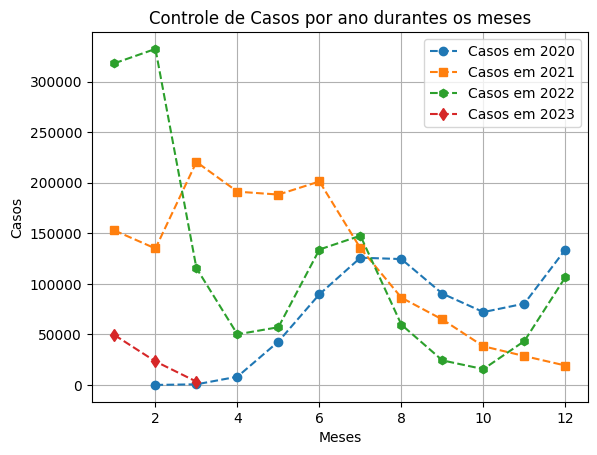

In [100]:
plt.rcdefaults()

casos_por_mes_2020 = df_brasil[df_brasil['ano'] == 2020].groupby('mes')['newCases'].sum()/10
casos_por_mes_2021 = df_brasil[df_brasil['ano'] == 2021].groupby('mes')['newCases'].sum()/10
casos_por_mes_2022 = df_brasil[df_brasil['ano'] == 2022].groupby('mes')['newCases'].sum()/10
casos_por_mes_2023 = df_brasil[df_brasil['ano'] == 2023].groupby('mes')['newCases'].sum()/10

x_periodo = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

plt.plot(casos_por_mes_2020.index, casos_por_mes_2020.values, label = "Casos em 2020", marker = 'o',linestyle='dashed')
plt.plot(casos_por_mes_2021.index, casos_por_mes_2021.values, label = "Casos em 2021", marker = 's',linestyle='dashed')
plt.plot(casos_por_mes_2022.index, casos_por_mes_2022.values, label = "Casos em 2022", marker = 'h',linestyle='dashed')
plt.plot(casos_por_mes_2023.index, casos_por_mes_2023.values, label = "Casos em 2023", marker = 'd',linestyle='dashed')

plt.title("Controle de Casos por ano durantes os meses")
plt.ylabel("Casos")
plt.xlabel("Meses")
plt.grid()
plt.legend();

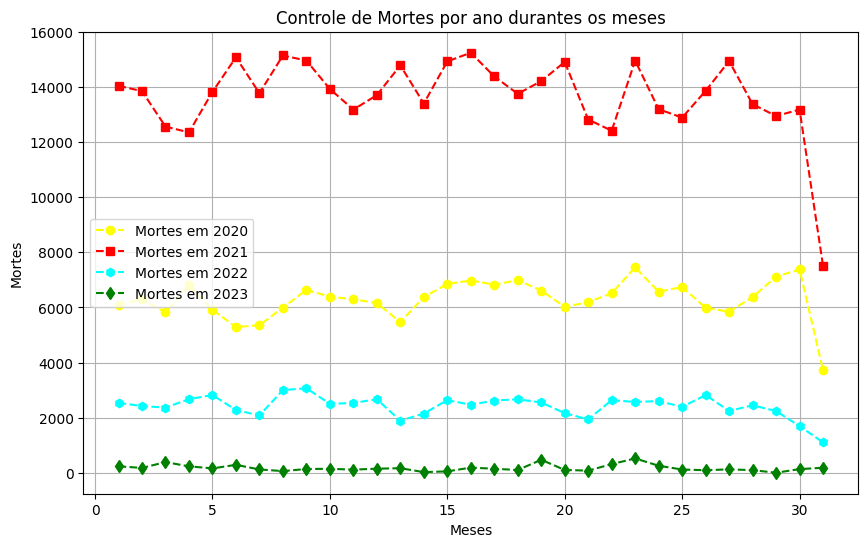

In [106]:
plt.rcdefaults()

mortes_por_mes_2020 = df_brasil[df_brasil['ano'] == 2020].groupby('dia')['newDeaths'].sum()
mortes_por_mes_2021 = df_brasil[df_brasil['ano'] == 2021].groupby('dia')['newDeaths'].sum()
mortes_por_mes_2022 = df_brasil[df_brasil['ano'] == 2022].groupby('dia')['newDeaths'].sum()
mortes_por_mes_2023 = df_brasil[df_brasil['ano'] == 2023].groupby('dia')['newDeaths'].sum()
plt.figure(figsize=(10, 6))
plt.plot(mortes_por_mes_2020.index, mortes_por_mes_2020.values, label = "Mortes em 2020", marker = 'o',linestyle='dashed', color ='yellow')
plt.plot(mortes_por_mes_2021.index, mortes_por_mes_2021.values, label = "Mortes em 2021", marker = 's',linestyle='dashed', color ='red')
plt.plot(mortes_por_mes_2022.index, mortes_por_mes_2022.values, label = "Mortes em 2022", marker = 'h',linestyle='dashed', color ='cyan')
plt.plot(mortes_por_mes_2023.index, mortes_por_mes_2023.values, label = "Mortes em 2023", marker = 'd',linestyle='dashed', color ='green')

plt.title("Controle de Mortes por ano durantes os meses")
plt.ylabel("Mortes")
plt.xlabel("Meses")
plt.grid()
plt.legend();

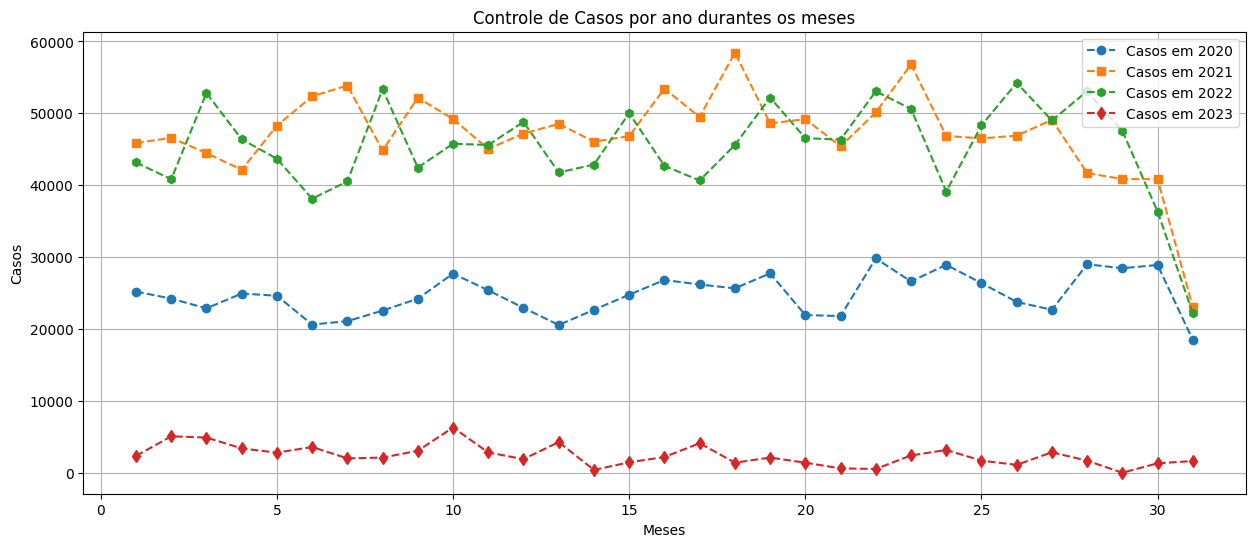

In [104]:
plt.rcdefaults()

casos_por_mes_2020 = df_brasil[df_brasil['ano'] == 2020].groupby('dia')['newCases'].sum()/10
casos_por_mes_2021 = df_brasil[df_brasil['ano'] == 2021].groupby('dia')['newCases'].sum()/10
casos_por_mes_2022 = df_brasil[df_brasil['ano'] == 2022].groupby('dia')['newCases'].sum()/10
casos_por_mes_2023 = df_brasil[df_brasil['ano'] == 2023].groupby('dia')['newCases'].sum()/10

x_periodo = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.figure(figsize=(15, 6))
plt.plot(casos_por_mes_2020.index, casos_por_mes_2020.values, label = "Casos em 2020", marker = 'o',linestyle='dashed')
plt.plot(casos_por_mes_2021.index, casos_por_mes_2021.values, label = "Casos em 2021", marker = 's',linestyle='dashed')
plt.plot(casos_por_mes_2022.index, casos_por_mes_2022.values, label = "Casos em 2022", marker = 'h',linestyle='dashed')
plt.plot(casos_por_mes_2023.index, casos_por_mes_2023.values, label = "Casos em 2023", marker = 'd',linestyle='dashed')

plt.title("Controle de Casos por ano durantes os meses")
plt.ylabel("Casos")
plt.xlabel("Meses")
plt.grid()
plt.legend();

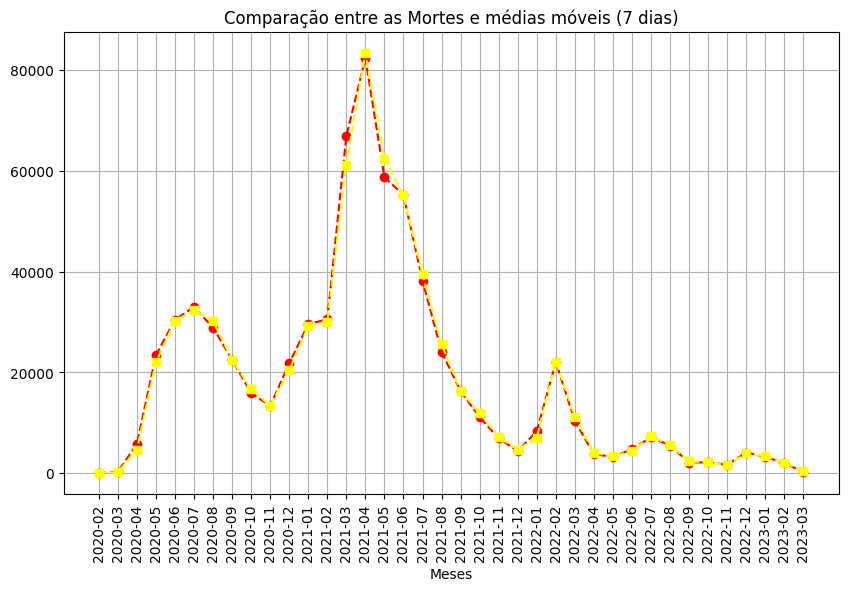

In [112]:
plt.rcdefaults()

mortes_por_mes = df_brasil.groupby('ano_mes')['newDeaths'].sum()
media_movel = df_brasil.groupby('ano_mes')['media_movel'].sum()

plt.figure(figsize=(10, 6))
plt.plot(mortes_por_mes.index, mortes_por_mes.values, label = "Mortes", marker = 'o',linestyle='dashed', color ='red')
plt.plot(media_movel.index, media_movel.values, label = "Media Movel", marker = 's',linestyle='dashed', color ='yellow')


plt.title("Comparação entre as Mortes e médias móveis (7 dias)")
plt.xlabel("Meses")
plt.grid()
plt.xticks(rotation=90)
plt.show()

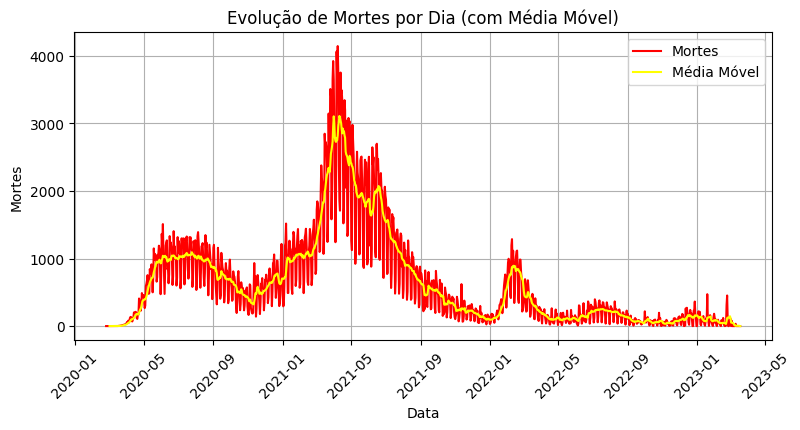

In [144]:
plt.rcdefaults()
plt.figure(figsize=(9, 4))
plt.plot()
plt.plot(df_brasil['date'], df_brasil['newDeaths'], label='Mortes', color = 'red') 
plt.plot(df_brasil['date'], df_brasil['media_movel'], label='Média Móvel', color = 'yellow')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.title('Evolução de Mortes por Dia (com Média Móvel)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

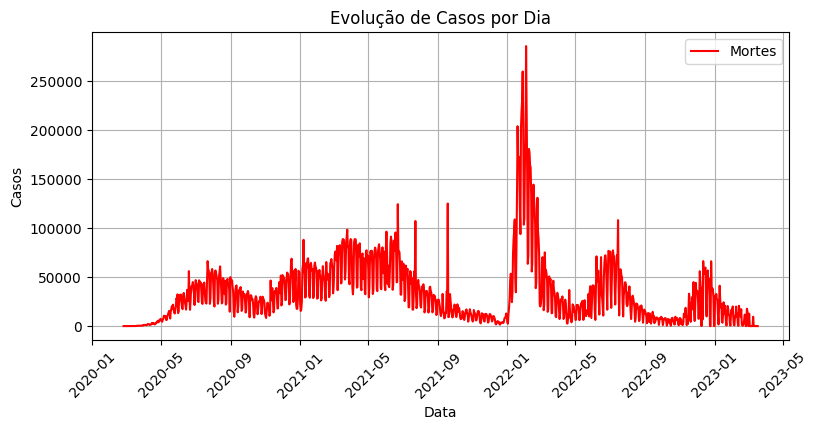

In [179]:
plt.rcdefaults()
plt.figure(figsize=(9, 4))
plt.plot()
plt.plot(df_brasil['date'], df_brasil['newCases'], label='Mortes', color = 'red') 
plt.xlabel('Data')
plt.ylabel('Casos')
plt.title('Evolução de Casos por Dia')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

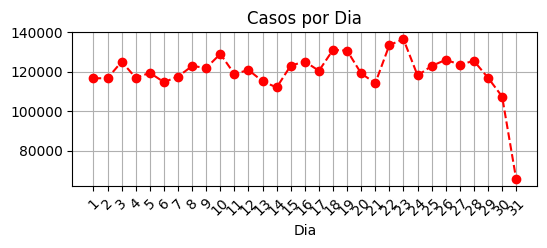

In [148]:
plt.rcdefaults()

mortes_por_dia = df_brasil.groupby('dia')['newCases'].sum()/10

plt.figure(figsize=(6, 2))
plt.plot(mortes_por_dia.index, mortes_por_dia.values, marker = 'o',linestyle='dashed', color ='red')
plt.title("Casos por Dia")
plt.xlabel("Dia")
plt.grid()
plt.xticks(rotation=45)
plt.xticks(mortes_por_dia.index)
plt.show()


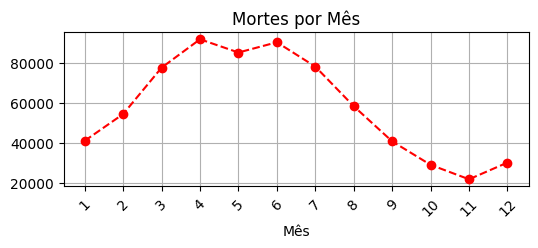

In [149]:
plt.rcdefaults()

mortes_por_mes = df_brasil.groupby('mes')['newDeaths'].sum()

plt.figure(figsize=(6, 2))
plt.plot(mortes_por_mes.index, mortes_por_mes.values, 
         marker = 'o',linestyle='dashed', color ='red')
plt.title("Mortes por Mês")
plt.xlabel("Mês")
plt.grid()
plt.xticks(rotation=45)
plt.xticks(mortes_por_mes.index)
plt.show()

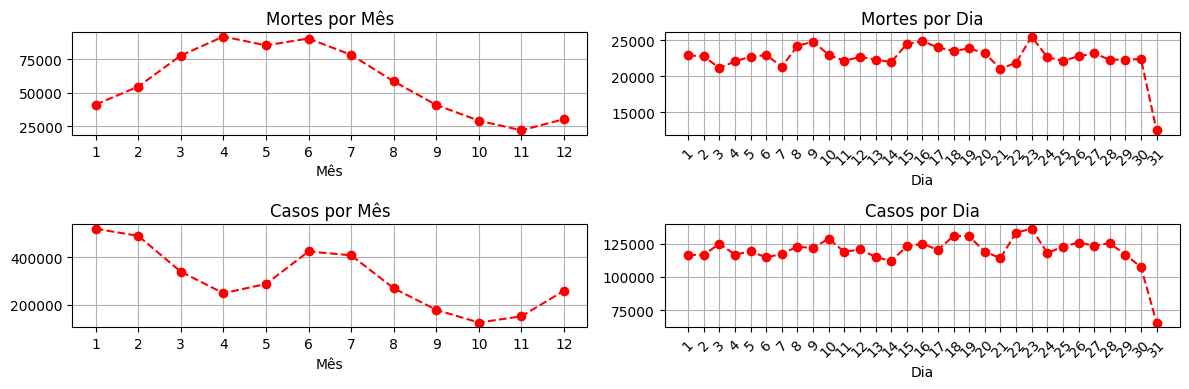

In [211]:
mortes_por_mes = df_brasil.groupby('mes')['newDeaths'].sum()
mortes_por_dia = df_brasil.groupby('dia')['newDeaths'].sum()
casos_por_mes = df_brasil.groupby('mes')['newCases'].sum()/10
casos_por_dia = df_brasil.groupby('dia')['newCases'].sum()/10

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,4))

axes[0, 0].plot(mortes_por_mes.index, mortes_por_mes.values, 
         marker = 'o',linestyle='dashed', color ='red')
axes[0, 0].set_title('Mortes por Mês')
axes[0, 0].set_xlabel("Mês")
axes[0, 0].set_xticks(mortes_por_mes.index)
axes[0, 0].grid(True)

axes[0, 1].plot(mortes_por_dia.index, mortes_por_dia.values, 
         marker = 'o',linestyle='dashed', color ='red')
axes[0, 1].set_title('Mortes por Dia')
axes[0, 1].set_xlabel("Dia")
axes[0, 1].set_xticks(mortes_por_dia.index)
axes[0, 1].grid(True)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticks(), rotation=45)

axes[1, 0].plot(casos_por_mes.index, casos_por_mes.values, 
         marker = 'o',linestyle='dashed', color ='red')
axes[1, 0].set_title('Casos por Mês')
axes[1, 0].set_xlabel("Mês")
axes[1, 0].set_xticks(casos_por_mes.index)
axes[1, 0].grid(True)

axes[1, 1].plot(casos_por_dia.index, casos_por_dia.values, 
         marker = 'o',linestyle='dashed', color ='red')
axes[1, 1].set_title('Casos por Dia')
axes[1, 1].set_xlabel("Dia")
axes[1, 1].set_xticks(casos_por_dia.index)
axes[1, 1].grid(True)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticks(), rotation=45)

plt.tight_layout()

plt.show()

In [192]:
print("Distribuição dos casos por estado:")
df_contagem_c = df_estado.groupby('state')['newCases'].sum().reset_index(name='Contagem')
print(df_contagem_c.sort_values(by='Contagem', ascending=False))
print("Distribuição dos mortes por estado:")
df_contagem_m = df_estado.groupby('state')['newDeaths'].sum().reset_index(name='Contagem')
print(df_contagem_m.sort_values(by='Contagem', ascending=False))

Distribuição dos casos por estado:
   state  Contagem
25    SP   6869746
10    MG   4430561
22    RS   3088787
18    RJ   3029125
17    PR   2994310
15    PE   2778909
4     BA   2538494
23    SC   2047214
8     GO   1997233
5     CE   1775802
7     ES   1420556
19    RN   1163182
13    PA    997677
12    MT    933486
6     DF    898072
14    PB    743016
26    TO    664477
11    MS    646314
2     AM    638010
9     MA    519895
20    RO    501283
16    PI    440016
24    SE    366053
1     AL    346687
21    RR    193253
3     AP    188601
0     AC    163389
Distribuição dos mortes por estado:
   state  Contagem
25    SP    193423
15    PE     89656
18    RJ     83742
10    MG     72125
17    PR     47695
22    RS     43834
5     CE     42215
4     BA     36101
8     GO     29008
9     MA     26724
23    SC     23853
13    PA     20548
7     ES     16390
12    MT     15879
2     AM     14655
6     DF     11845
11    MS     11346
14    PB     11272
19    RN     10695
16    PI      863

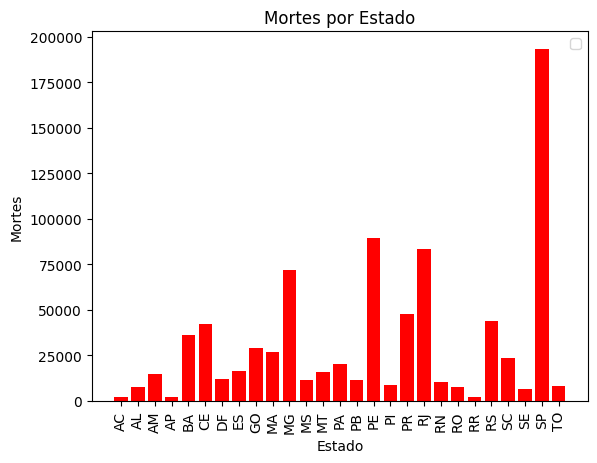

In [188]:
plt.rcdefaults()
mortes_por_estado = df_estado.groupby('state')['newDeaths'].sum()
plt.bar(mortes_por_estado.index, mortes_por_estado.values, color = 'red')
plt.xlabel('Estado')
plt.ylabel('Mortes')
plt.title('Mortes por Estado')
plt.xticks(rotation=90)
plt.legend();

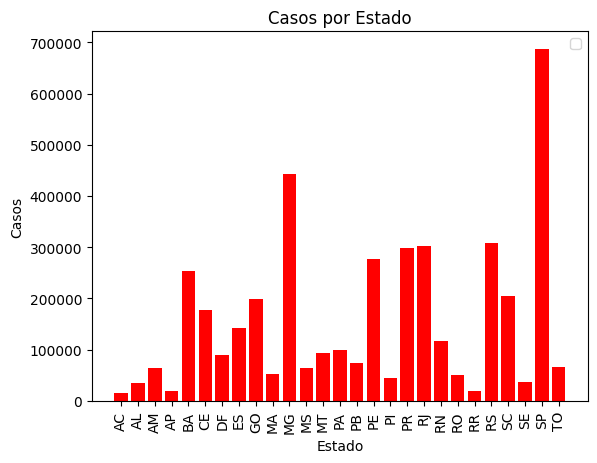

In [200]:
plt.rcdefaults()
mortes_por_estado = df_estado.groupby('state')['newCases'].sum()/10
plt.bar(mortes_por_estado.index, mortes_por_estado.values, color = 'red')
plt.xlabel('Estado')
plt.ylabel('Casos')
plt.title('Casos por Estado')
plt.xticks(rotation=90)
plt.legend();

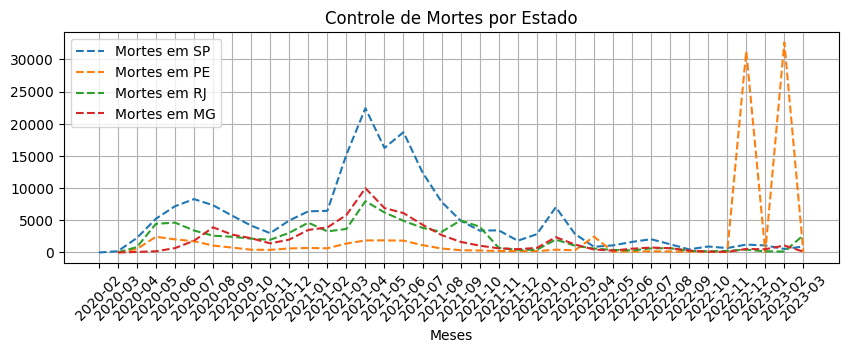

In [207]:
df_sp = df_estado.query('state == "SP"')
df_pe = df_estado.query('state == "PE"')
df_rj = df_estado.query('state == "RJ"')
df_mg = df_estado.query('state == "MG"')

plt.rcdefaults()

mortes_sp = df_estado[df_estado['state'] == 'SP'].groupby('ano_mes')['newDeaths'].sum()
mortes_pe = df_estado[df_estado['state'] == 'PE'].groupby('ano_mes')['newDeaths'].sum()
mortes_rj = df_estado[df_estado['state'] == 'RJ'].groupby('ano_mes')['newDeaths'].sum()
mortes_mg = df_estado[df_estado['state'] == 'MG'].groupby('ano_mes')['newDeaths'].sum()
plt.figure(figsize=(10, 3))
plt.plot(mortes_sp.index, mortes_sp.values, label = "Mortes em SP", linestyle='dashed')
plt.plot(mortes_pe.index, mortes_pe.values, label = "Mortes em PE", linestyle='dashed')
plt.plot(mortes_rj.index, mortes_rj.values, label = "Mortes em RJ", linestyle='dashed')
plt.plot(mortes_mg.index, mortes_mg.values, label = "Mortes em MG", linestyle='dashed')

plt.title("Controle de Mortes por Estado")
plt.xlabel("Meses")
plt.grid()
plt.xticks(rotation=45)
plt.legend();


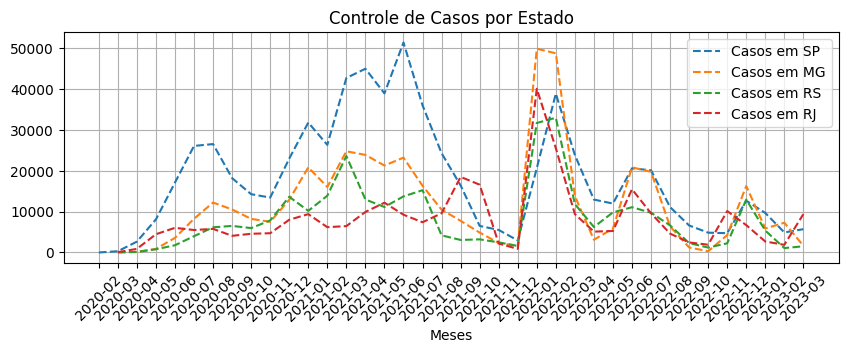

In [209]:
plt.rcdefaults()

mortes_sp = df_estado[df_estado['state'] == 'SP'].groupby('ano_mes')['newCases'].sum()/10
mortes_mg = df_estado[df_estado['state'] == 'MG'].groupby('ano_mes')['newCases'].sum()/10
mortes_rs = df_estado[df_estado['state'] == 'RS'].groupby('ano_mes')['newCases'].sum()/10
mortes_rj = df_estado[df_estado['state'] == 'RJ'].groupby('ano_mes')['newCases'].sum()/10

plt.figure(figsize=(10, 3))
plt.plot(mortes_sp.index, mortes_sp.values, label = "Casos em SP", linestyle='dashed')
plt.plot(mortes_mg.index, mortes_mg.values, label = "Casos em MG", linestyle='dashed')
plt.plot(mortes_rs.index, mortes_rs.values, label = "Casos em RS", linestyle='dashed')
plt.plot(mortes_rj.index, mortes_rj.values, label = "Casos em RJ", linestyle='dashed')


plt.title("Controle de Casos por Estado")
plt.xlabel("Meses")
plt.grid()
plt.xticks(rotation=45)
plt.legend();
